# Proyek Analisis Data: [E-Commerce-publick-dataset.zip]
- **Nama:** [Vito Aji Pradipta]
- **Email:** [m004b4ky4439@bangkit.academy]
- **ID Dicoding:** [vito_aji_pradipta_77]

## Menentukan Pertanyaan Bisnis

- Question 1 : How does a shipment have different delivery times and what categories have fast and slow delivery times ?
- Question 2 : which city has the largest e-commerce revenue and is it directly proportional based on customer review ratings ?

## Import Semua Packages/Library yang Digunakan

In [1]:
#mengimpor semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#masukkan dataset
orders = pd.read_csv('orders_dataset.csv')
products = pd.read_csv('products_dataset.csv')
customers = pd.read_csv('customers_dataset.csv')
reviews = pd.read_csv('order_reviews_dataset.csv')
payments = pd.read_csv('order_payments_dataset.csv')

**Insight:**
- orders dataset will help calculate delivery times and statuses for different products
- customer and reviews dataset will help to correlate customer satisfaction with revenue

### Assessing Data

In [ ]:
orders.info()
orders.head()
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 n

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Orders dataset contains importan timestamps such as order creation and delivery times
- missing values are visible in certain columns, especially in order status, indicating canceled or incomplete orders

### Cleaning Data

In [ ]:
#ubah date columns ke datetime
orders['order_purchase_timestamp']= pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date']= pd.to_datetime(orders['order_delivered_customer_date'])

#hitung delivery time in days
orders['delivery_time'] = (orders['order_delivered_customer_date']-orders['order_purchase_timestamp']).dt.days

#hapus rows with missing delivery
orders_clean =orders.dropna(subset=['order_delivered_customer_date'])


**Insight:**
- some orders maay not have shipping information due to delays
- the new delivery_time column allows us to analyze delivery times based on factors such as product category or customer location

## Exploratory Data Analysis (EDA)

### Explore ...

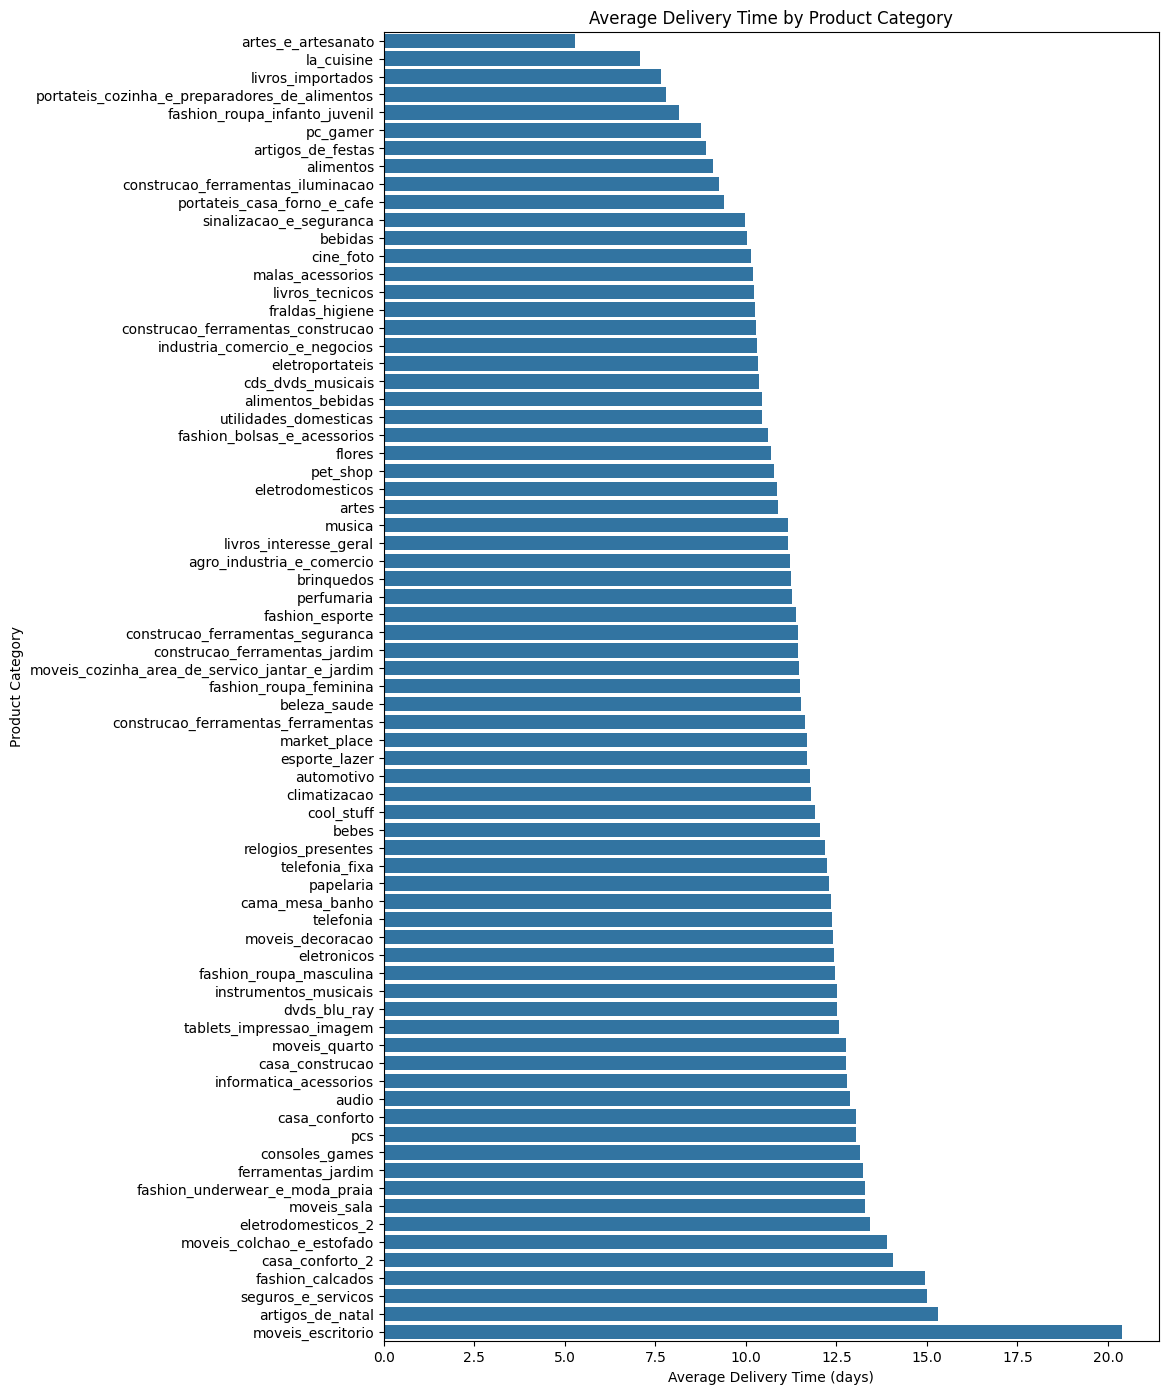

In [ ]:
# masukan order_items dataset
order_items= pd.read_csv('order_items_dataset.csv')

#satukan orders dengan order_items
order_items_merged=pd.merge(orders_clean,order_items, on='order_id', how='inner')
order_products= pd.merge(order_items_merged, products, on='product_id', how='inner')

#kelompokkan berdasarkan product category dan hitung average delivery time
category_delivery_time = order_products.groupby('product_category_name')['delivery_time'].mean().sort_values()

#visualisai delivery time by category
plt.figure(figsize=(10,17))
sns.barplot(x=category_delivery_time.values, y=category_delivery_time.index)
plt.title('Average Delivery Time by Product Category')
plt.xlabel('Average Delivery Time (days)')
plt.ylabel('Product Category')
plt.show()

**Insight:**
- categories with the longest delivery times may indicate supply chain issues or logistics challenges
- shorter delivery times for certain categories indicate an efficient process

## Visualization & Explanatory Analysis

### Pertanyaan 1:

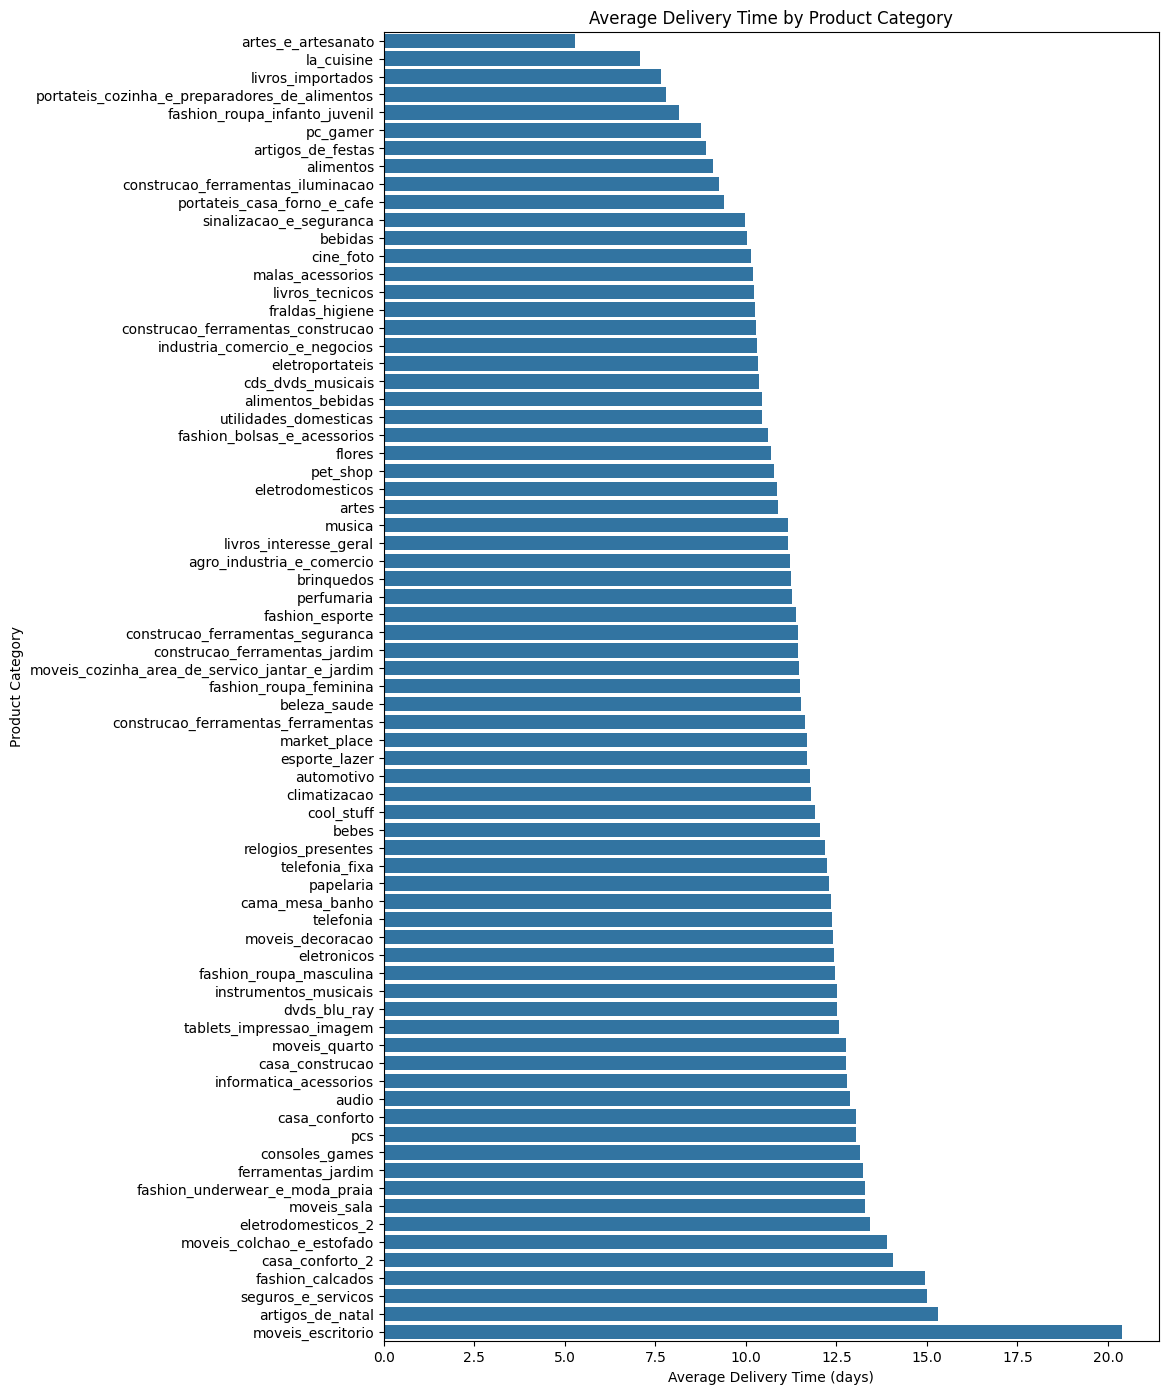

In [ ]:
#visualisasi delivery time by category
plt.figure(figsize=(10,17))
sns.barplot(x=category_delivery_time.values, y=category_delivery_time.index)
plt.title('Average Delivery Time by Product Category')
plt.xlabel('Average Delivery Time (days)')
plt.ylabel('Product Category')
plt.show()

### Pertanyaan 2:

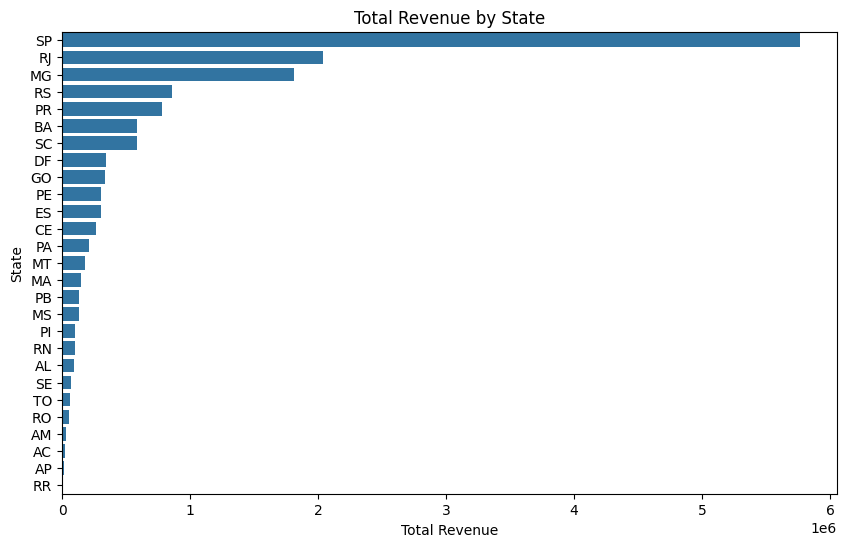

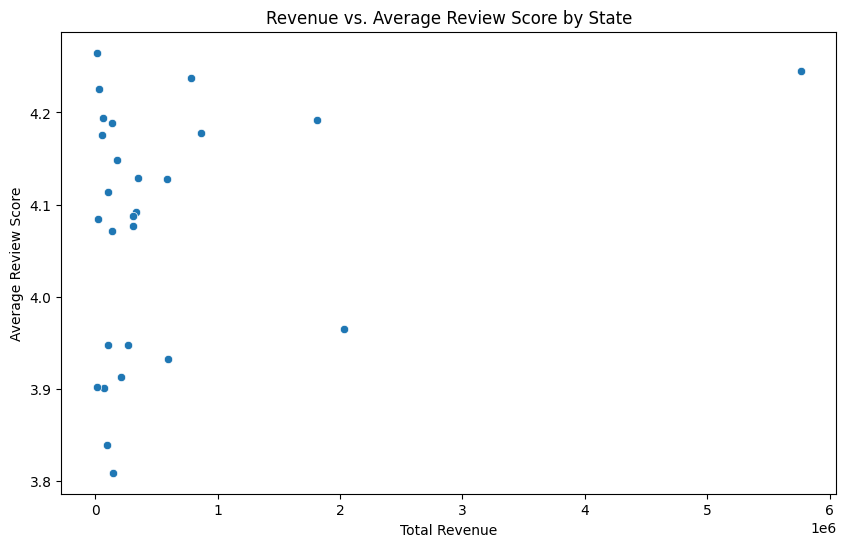

In [ ]:
# satukan orders, payments, customers, dan reviews datasets
order_payments = pd.merge(orders_clean, payments, on='order_id', how='inner')
order_customers = pd.merge(order_payments, customers, on='customer_id', how='inner')
order_reviews = pd.merge(order_customers, reviews, on='order_id', how='inner')

# Gabungkan berdasarkan customer state dan hitung total revenue dan average review score
state_revenue_review = order_reviews.groupby('customer_state').agg(
    total_revenue=('payment_value', 'sum'),
    avg_review_score=('review_score', 'mean')
).sort_values('total_revenue', ascending=False)

# Visualize revenue berdasarkan city
plt.figure(figsize=(10,6))
sns.barplot(x=state_revenue_review['total_revenue'], y=state_revenue_review.index)
plt.title('Total Revenue by State')
plt.xlabel('Total Revenue')
plt.ylabel('State')
plt.show()

# plot untuk melihat korelasi antara revenue dan review scores
plt.figure(figsize=(10,6))
sns.scatterplot(x=state_revenue_review['total_revenue'], y=state_revenue_review['avg_review_score'])
plt.title('Revenue vs. Average Review Score by State')
plt.xlabel('Total Revenue')
plt.ylabel('Average Review Score')
plt.show()

**Insight:**
- For Question 1 =
  1. categories such as Furniture and Housewares have the longest delivery times, possibly due to their size or logistical complexity.
  2. categories such as Books and Fashion Accessories have shorter delivery times, possibly due to easier handling and availability.

- For Question 2 =
  1. States like São Paulo and Rio de Janeiro contribute significantly to overall revenue.
  2. There seems to be a weak or negative correlation between total revenue and average review score, which suggests that higher sales do not necessarily equate to higher customer satisfaction.

## Conclusion

- Conclution for question 1 =
  the analysus shows significant differences in delivery times acroos product categories, which can be noticed by looking at the table that larger items such as furniture experience longer delays, while smaller easy to ship items tend arrive faster
- Conclution for question 2 =
  states/city like Sao Paulo are major contributors to e-commerce revenue and customer satisfaction does not have strong correlation, indicating that service quality in revenuee areas must be improved in order to incease customer ratings